In [1]:
# Dispersion Ratio

- also known as the coefficient of dispersion
- gives degree of variability or spread in a dataset relative to its mean (central tendency)
- The dispersion ratio is calculated as the ratio of the standard deviation (σ) to the absolute mean deviation (MAD) or average absolute deviation (AAD). 
- A higher dispersion ratio indicates greater variability relative to the mean, while a lower dispersion ratio indicates less variability.

The formula for dispersion ratio (DR) is:

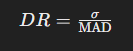

In [2]:
import numpy as np

# Generate a sample dataset
np.random.seed(0)  # For reproducibility
data = np.random.normal(loc=0, scale=1, size=100)  # Sample data from a normal distribution

# Calculate standard deviation (σ)
std_dev = np.std(data)

# Calculate absolute mean deviation (MAD)
abs_mean_dev = np.mean(np.abs(data - np.mean(data)))

# Calculate dispersion ratio (DR)
dispersion_ratio = std_dev / abs_mean_dev

print("Standard Deviation (σ):", std_dev)
print("Absolute Mean Deviation (MAD):", abs_mean_dev)
print("Dispersion Ratio (DR):", dispersion_ratio)

Standard Deviation (σ): 1.0078822447165796
Absolute Mean Deviation (MAD): 0.8052222697425467
Dispersion Ratio (DR): 1.251682029408885


### Feature selection using dispersion ratio

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Load the Iris dataset (or any other dataset you want to use)
iris = load_iris()
X, y = iris.data, iris.target

# Define a function to calculate the dispersion ratio for a feature
def dispersion_ratio(X_feature):
    std_dev = np.std(X_feature)  # Calculate standard deviation
    abs_mean_dev = np.mean(np.abs(X_feature - np.mean(X_feature)))  # Calculate absolute mean deviation
    return std_dev / abs_mean_dev  # Calculate dispersion ratio

# Calculate dispersion ratio for each feature
dispersion_ratios = [dispersion_ratio(X[:, i]) for i in range(X.shape[1])]

# Sort features based on dispersion ratio (higher ratio means more dispersion)
sorted_indices = np.argsort(dispersion_ratios)[::-1]  # Sort in descending order

# Select top k features based on dispersion ratio
k = 2  # Number of features to select
selected_indices = sorted_indices[:k]

# Apply feature selection using SelectKBest with f_regression as the scoring function
k_best_features = SelectKBest(score_func=f_regression, k=k)
X_new = k_best_features.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_names = [iris.feature_names[i] for i in selected_indices]
print("Selected features based on dispersion ratio:", selected_feature_names)


Selected features based on dispersion ratio: ['sepal width (cm)', 'sepal length (cm)']
